In [28]:
# Enhancing the Student Performance Prediction Model with a Small Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR

import joblib


In [29]:
# Load datasets (modify the filenames as needed)
data_missing = pd.read_csv('student_performance_dataset_withmissing.csv')
data_clean = pd.read_csv('student_performance_dataset.csv')

# Clean up column names (remove extra spaces)
data_missing.columns = data_missing.columns.str.strip()
data_clean.columns = data_clean.columns.str.strip()

# Preview datasets
print("Clean Data Sample:")
display(data_clean.head())
print("Missing Data Sample:")
display(data_missing.head())
print("Summary Statistics for Clean Data:")
display(data_clean.describe())
print("Summary Statistics for Data with Missing Values:")
display(data_missing.describe())

Clean Data Sample:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
0,1,11.5,82.5,78.4,74.2,0,52.0
1,2,9.6,83.5,80.5,86.5,1,49.4
2,3,11.9,73.2,91.0,63.2,1,47.3
3,4,14.6,82.3,89.9,81.0,1,63.7
4,5,9.3,82.9,84.8,68.6,1,55.9


Missing Data Sample:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
0,1,11.5,82.5,78.4,74.2,0.0,52.0
1,2,9.6,83.5,80.5,86.5,NaN,49.4
2,3,11.9,73.2,91.0,63.2,1.0,47.3
3,4,14.6,82.3,89.9,81.0,NaN,63.7
4,5,9.3,82.9,84.8,68.6,1.0,55.9


Summary Statistics for Clean Data:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,9.751333,80.493333,85.388000,73.731333,0.673333,54.588667
std,43.445368,2.829417,9.647907,7.484444,11.388957,0.470565,6.343485
min,1.000000,2.100000,47.600000,68.000000,45.300000,0.000000,38.900000
25%,38.250000,8.025000,73.125000,80.200000,65.825000,0.000000,50.150000
50%,75.500000,9.850000,81.400000,85.300000,73.300000,1.000000,54.250000
75%,112.750000,11.475000,86.750000,90.500000,81.475000,1.000000,58.675000
max,150.000000,17.400000,100.000000,100.000000,100.000000,1.000000,69.500000


Summary Statistics for Data with Missing Values:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
count,150.000000,138.000000,134.000000,142.000000,137.000000,134.000000,150.000000
mean,75.500000,9.661594,80.266418,85.270423,73.932847,0.656716,54.588667
std,43.445368,2.794398,9.381617,7.596031,11.421266,0.476587,6.343485
min,1.000000,2.100000,47.600000,68.000000,45.300000,0.000000,38.900000
25%,38.250000,8.025000,73.125000,79.750000,65.800000,0.000000,50.150000
50%,75.500000,9.650000,80.950000,85.150000,73.700000,1.000000,54.250000
75%,112.750000,11.350000,86.300000,90.500000,81.500000,1.000000,58.675000
max,150.000000,17.400000,100.000000,100.000000,100.000000,1.000000,69.500000


Data with Missing Values Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student ID                   150 non-null    int64  
 1   Study Hours                  138 non-null    float64
 2   Attendance (%)               134 non-null    float64
 3   Assignment Completion (%)    142 non-null    float64
 4   Midterm Score                137 non-null    float64
 5   Group Project Participation  134 non-null    float64
 6   Final Exam Score             150 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.3 KB

Missing Values Count:
Student ID                      0
Study Hours                    12
Attendance (%)                 16
Assignment Completion (%)       8
Midterm Score                  13
Group Project Participation    16
Final Exam Score                0
dtype: int64


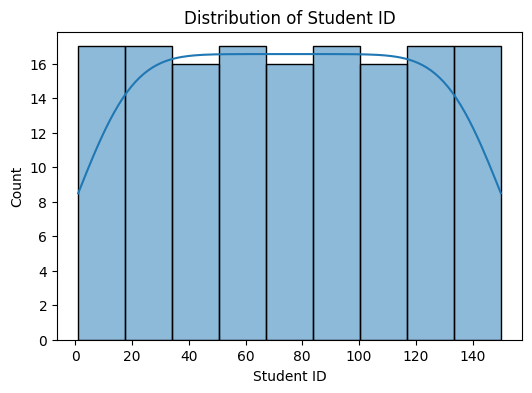

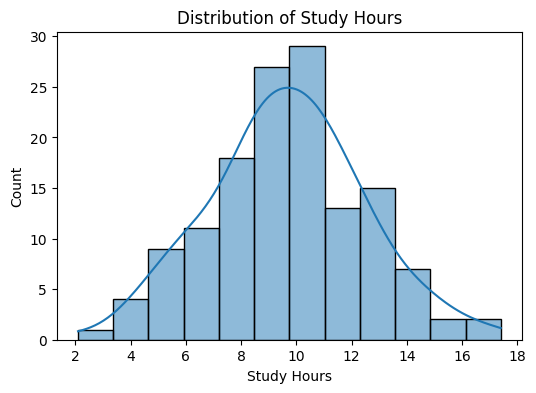

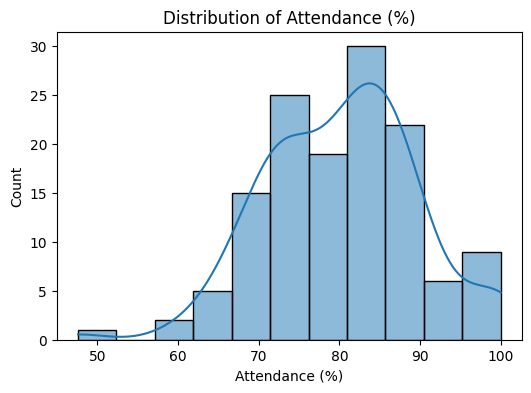

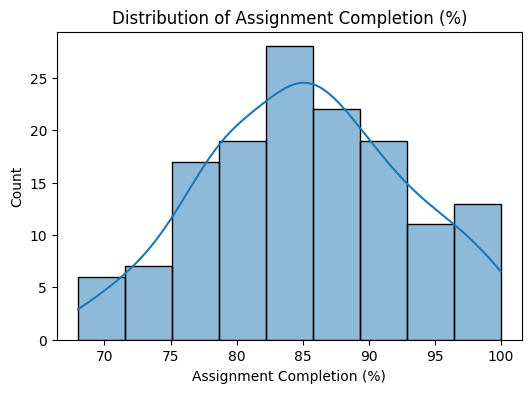

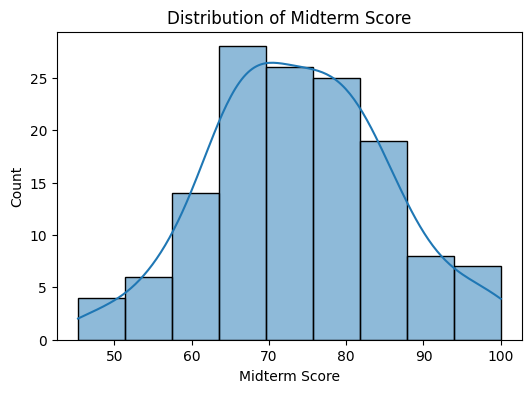

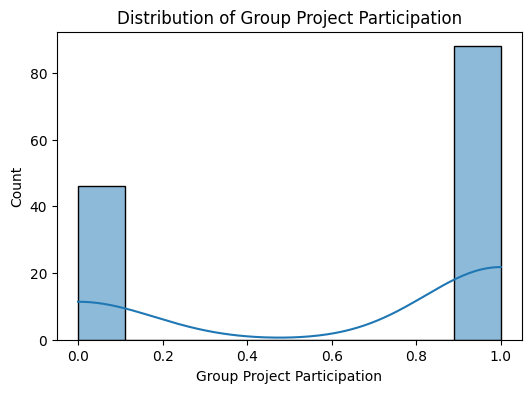

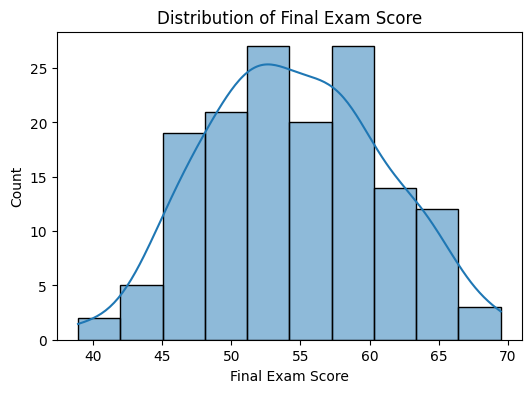

In [30]:
print("Data with Missing Values Info:")
data_missing.info()

print("\nMissing Values Count:")
print(data_missing.isnull().sum())

# Visualize the distribution of each column
for column in data_missing.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_missing[column].dropna(), kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


In [31]:
# Features and Target
features = ['Study Hours', 'Attendance (%)', 'Assignment Completion (%)', 'Midterm Score', 'Group Project Participation']
target = 'Final Exam Score'
X = data_missing[features]
y = data_missing[target]

# Split the dataset (80/20 split). Do this before imputation to avoid data leakage.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=features)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=features)

# Check for remaining missing values
print("Remaining missing values in training set:\n", X_train_imputed.isnull().sum())
print("Remaining missing values in test set:\n", X_test_imputed.isnull().sum())

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


Training set size: (120, 5), Test set size: (30, 5)
Remaining missing values in training set:
 Study Hours                    0
Attendance (%)                 0
Assignment Completion (%)      0
Midterm Score                  0
Group Project Participation    0
dtype: int64
Remaining missing values in test set:
 Study Hours                    0
Attendance (%)                 0
Assignment Completion (%)      0
Midterm Score                  0
Group Project Participation    0
dtype: int64


In [32]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)

# Standardize the polynomial features
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Select top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)


In [33]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Support Vector Regression (SVR)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)


In [34]:
# Linear Regression with augmented features
lr_poly = LinearRegression()
lr_poly.fit(X_train_selected, y_train)
y_pred_lr_poly = lr_poly.predict(X_test_selected)


In [35]:
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR(kernel='rbf', C=100, epsilon=0.1)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

stacking_reg = StackingRegressor(
    estimators=estimators, 
    final_estimator=GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
)

# Use the original scaled features for stacking
stacking_reg.fit(X_train_scaled, y_train)
y_pred_stack = stacking_reg.predict(X_test_scaled)
print("Stacking Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))
print("Stacking Regressor R²:", r2_score(y_test, y_pred_stack))


Stacking Regressor RMSE: 5.60346496755513
Stacking Regressor R²: -0.019442196188883543


In [36]:
ridge = Ridge(random_state=42)
parameters = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, parameters, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_)
ridge_pred = ridge_cv.predict(X_test_scaled)
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))


Best alpha for Ridge: {'alpha': 10}
Ridge Regression R²: 0.10439508316225932


In [37]:
loo = LeaveOneOut()
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=loo, scoring='r2')
print("LOOCV R² scores for Linear Regression:", cv_scores)
print("Mean LOOCV R²:", np.mean(cv_scores))


/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two sample

LOOCV R² scores for Linear Regression: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
Mean LOOCV R²: nan


/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two sample

In [38]:
# Dictionary of models and predictions (using original scaled features)
models = {
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'SVR': y_pred_svr,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Stacking Regressor': y_pred_stack,
    'Ridge Regression': ridge_pred,
    'Linear Regression (Poly)': y_pred_lr_poly  # prediction on augmented features
}

results = {}
for name, y_pred in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2, 'Accuracy %': r2 * 100}

results_df = pd.DataFrame(results).T.round(2)
print("\n📊 Model Evaluation Summary (with Accuracy %):")
print(results_df)



📊 Model Evaluation Summary (with Accuracy %):
                          RMSE   MAE    R²  Accuracy %
Linear Regression         5.31  4.09  0.09        8.61
Decision Tree             7.62  6.26 -0.88      -88.34
SVR                       7.48  6.58 -0.81      -81.49
Random Forest             5.82  5.14 -0.10       -9.93
Gradient Boosting         6.10  5.12 -0.21      -20.96
Stacking Regressor        5.60  4.64 -0.02       -1.94
Ridge Regression          5.25  4.12  0.10       10.44
Linear Regression (Poly)  5.14  4.12  0.14       14.24


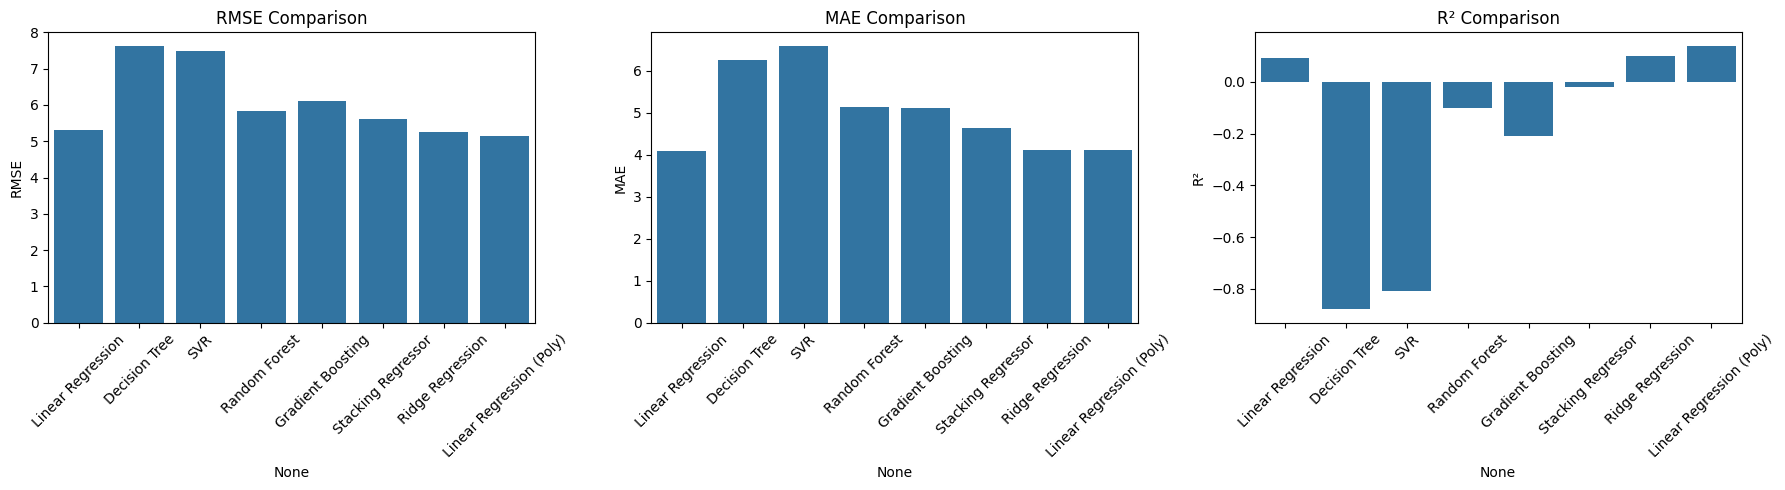

In [39]:
# Bar plots for RMSE, MAE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=results_df.index, y='RMSE', data=results_df, ax=axes[0])
axes[0].set_title('RMSE Comparison')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df.index, y='MAE', data=results_df, ax=axes[1])
axes[1].set_title('MAE Comparison')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df.index, y='R²', data=results_df, ax=axes[2])
axes[2].set_title('R² Comparison')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [41]:
# Identify the best model based on R² score
best_model_name = results_df['R²'].idxmax()
print(f"\n✅ The best performing model is **{best_model_name}** with an R² score of {results_df.loc[best_model_name, 'R²']}.")

# Save the corresponding model
# Here, update the variable to the actual model instance (example: if best model is Linear Regression)
if best_model_name == 'Linear Regression':
    best_model_instance = lr
elif best_model_name == 'Decision Tree':
    best_model_instance = dt
elif best_model_name == 'SVR':
    best_model_instance = svr
elif best_model_name == 'Random Forest':
    best_model_instance = rf
elif best_model_name == 'Gradient Boosting':
    best_model_instance = gb
elif best_model_name == 'Stacking Regressor':
    best_model_instance = stacking_reg
elif best_model_name == 'Ridge Regression':
    best_model_instance = ridge_cv
elif best_model_name == 'Linear Regression (Poly)':
    best_model_instance = lr_poly

# Save the model to disk
model_filename = f"{best_model_name.replace(' ', '_').lower()}_student_performance_model.pkl"
joblib.dump(best_model_instance, model_filename)
joblib.dump(poly, "poly.pkl")
joblib.dump(scaler, "poly_scaler.pkl")  # Ensure this scaler is the one fitted on the polynomial features
joblib.dump(selector, "selector.pkl")
print(f"✅ Saved the best model '{best_model_name}' as '{model_filename}' in the working directory.")



✅ The best performing model is **Linear Regression (Poly)** with an R² score of 0.14.
✅ Saved the best model 'Linear Regression (Poly)' as 'linear_regression_(poly)_student_performance_model.pkl' in the working directory.
